In [1]:
# import the necessary libraries .
import pandas as pd


In [2]:
#importing tha housing into our model in the varible as df
df = pd.read_excel("/kaggle/input/housing/Housing.xlsx")


In [3]:
# seeing the first 10 elements in the file using the head function 
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# describing the formt of the current daataset
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
#viewing the information of the current dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
#hecking for the null vaalue present in the datasets
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
# some of the vaalues is in yes and no .
#we cannot use as it is so we are changing the yes or values into the zeroes and onces 
list1 = [ 'mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[list1] = df[list1].replace({'yes':1,'no':0})

/tmp/ipykernel_13/519357638.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[list1] = df[list1].replace({'yes':1,'no':0})


In [9]:
#now u can check that
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [10]:
#checking how may type of words precent it it in 'furnishingstatus'
df['furnishingstatus'].nunique()

3

In [11]:
# now replce the words with the numeric as 0,s and 1,s
df['furnishingstatus'] =df['furnishingstatus'].replace({'furnished':0,'semi-furnished':1,'unfurnished':2})

/tmp/ipykernel_13/4217882957.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['furnishingstatus'] =df['furnishingstatus'].replace({'furnished':0,'semi-furnished':1,'unfurnished':2})


In [12]:
# importing the standardscaler in sklearn lib
from sklearn.preprocessing import StandardScaler

In [13]:

scalar = StandardScaler()
list2 =['price','area']
# transforming the values for the trainning the models .if the value was small leans the accurancy was more 
df[list2]= scalar.fit_transform(df[list2])

In [14]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,4,2,3,1,0,0,0,1,2,1,0
1,4.004484,1.757010,4,4,4,1,0,0,0,1,3,0,0
2,4.004484,2.218232,3,2,2,1,0,1,0,0,2,1,1
3,3.985755,1.083624,4,2,2,1,0,1,0,1,3,1,0
4,3.554979,1.046726,4,1,2,1,1,1,0,1,2,0,0


In [15]:
#The .corr() function computes the correlation coefficients between all pairs of numerical features in your DataFrame.
core = df.corr()


In [16]:
#imported Matplotlib and Seaborn, two great visualization libraries.
import matplotlib.pyplot as plt
import seaborn as sns

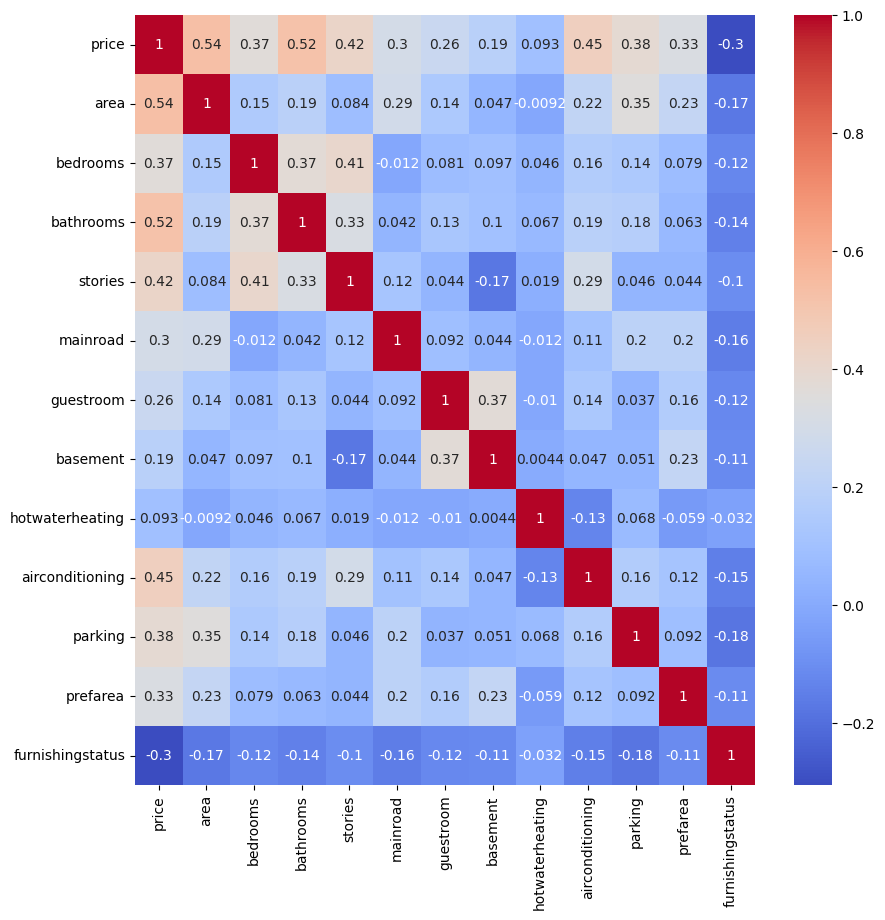

In [17]:
#plt.figure(figsize=(10,10)): Sets the size of the figure.

#sns.heatmap(...): Creates a heatmap from the correlation matrix.

#annot=True displays the correlation values inside the boxes.
plt.figure(figsize=(10,10))
sns.heatmap(core,annot=True , cmap='coolwarm')
plt.show()

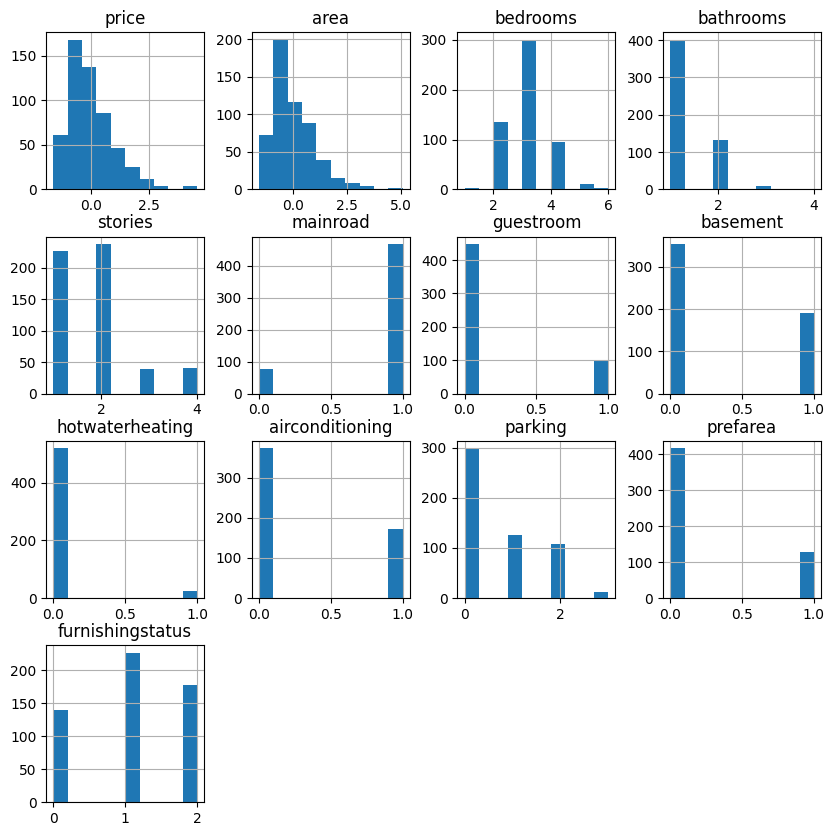

In [18]:
df.hist(figsize=(10,10), bins=10)
plt.show()

In [19]:
# drop the price column in dataset
x = df.drop('price',axis=1)
y = df['price']

In [20]:
# imported train_test_split to divide your dataset.
#x contains features (like area, bedrooms, etc.), and y contains the target variable (price).
#test_size=0.2 means 20% of the data is for testing, 80% for training.
#random_state=42 ensures the split is reproducible.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
#imported LinearRegression and created an instance lr of the model.

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [22]:
#You trained (fit) the model on the training data (x_train, y_train).
#The model learns the relationship between features and the target (price).

lr.fit(x_train,y_train)

LinearRegression()

In [23]:
#used the trained model to predict house prices on the test data (x_test).
y_predict = lr.predict(x_test)

In [24]:
#Evaluating the Model (R² Score)
from sklearn.metrics import r2_score
lr_accuracy = r2_score(y_test, y_predict) * 100


In [25]:
# printed the R² accuracy: ~64.95%, which is a decent score depending on your dataset.
lr_accuracy

64.94754192267796